In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Load dataset
data = pd.read_csv('../data/ENB2012_data_with_columns.csv')

# Check for NaN values and replace or drop them
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()

In [3]:
# Define input and output variables
X = data.iloc[:, :-2]
y_hl = data['Heating_Load']

In [4]:
# Initialize model with best parameters
best_params_hl = {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 1}
xgb_model_hl = XGBRegressor(**best_params_hl)

In [5]:
# Lists to store metrics for each run
mae_list = []
r2_list = []

In [6]:
# Run the model 30 times
for run in range(30):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_hl, test_size=0.2, random_state=run)
    
    # Train the model
    xgb_model_hl.fit(X_train, y_train)
    
    # Predict
    y_pred = xgb_model_hl.predict(X_test)
    
    # Calculate MAE and R-Squared
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append metrics to the lists
    mae_list.append(mae)
    r2_list.append(r2)

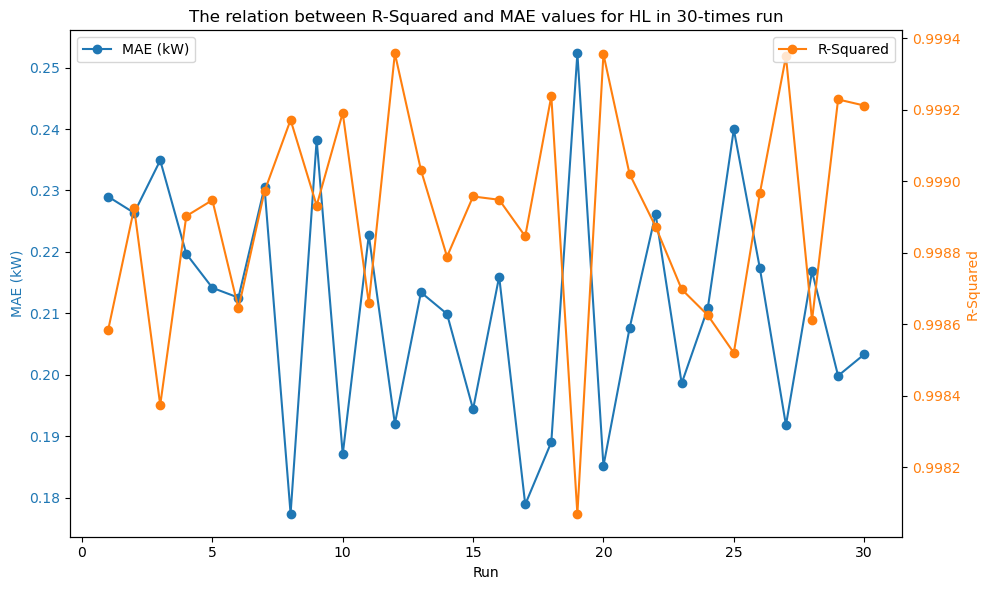

In [7]:
# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot MAE
color = 'tab:blue'
ax1.set_xlabel('Run')
ax1.set_ylabel('MAE (kW)', color=color)
ax1.plot(range(1, 31), mae_list, color=color, marker='o', label='MAE (kW)')
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('R-Squared', color=color)
ax2.plot(range(1, 31), r2_list, color=color, marker='o', linestyle='-', label='R-Squared')
ax2.tick_params(axis='y', labelcolor=color)

# Add title and legend
plt.title('The relation between R-Squared and MAE values for HL in 30-times run')
fig.tight_layout()  # Ensure the plot fits into the figure area
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Save the plot
plt.savefig('../results/figures/mae_vs_r2_hl_30_runs.png')

# Show the plot
plt.show()